In [1]:
import sourmash
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()
#from sklearn.metrics import r2_score
import scipy as sp


In [2]:
comp_csv = "output.ani-commonsp10-evolpath/combinedANI.csv"
compInfo = pd.read_csv(comp_csv)
# divide fastani by 100 to match other ANI vals
compInfo["avg_fastani_ident"] = compInfo["avg_fastani_ident"]/100
compInfo.head()

,comparison_name,identA,identB,pyani_ident,pyani_coverage,pyani_aln_length,pyani_sim_errors,pyani_hadamard,avg_fastani_ident,avg_fastani_alignment_fraction,...,orthoANI_query_coverage,orthoANI_subject_coverage,orthoANI_query_length,orthoANI_subject_length,avg_cANI_k21_sc1,avg_cANI_k21_sc10,avg_cANI_k21_sc100,avg_cANI_k21_sc1000,lca_lineage,lca_rank
0,GCF_000742135.1_x_GCF_015627065.1,GCF_000742135.1,GCF_015627065.1,0.990181,0.853798,4786334.5,45656.5,0.845418,0.988820,0.874019,...,0.632189,0.624717,5543700,5610000,0.987483,0.987460,0.987471,0.987204,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,species
1,GCF_000742135.1_x_GCA_902508775.1,GCF_000742135.1,GCA_902508775.1,0.990825,0.872058,4765879.5,42931.5,0.864056,0.989544,0.886588,...,0.620838,0.644803,5543700,5337660,0.988172,0.988111,0.988130,0.988132,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,species
2,GCF_000742135.1_x_GCF_900502275.1,GCF_000742135.1,GCF_900502275.1,0.990546,0.868461,4726725.5,43613.0,0.860251,0.990319,0.881098,...,0.639972,0.666459,5543700,5323380,0.988209,0.988187,0.988240,0.988268,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,species
3,GCF_000742135.1_x_GCF_018439335.1,GCF_000742135.1,GCF_018439335.1,0.836008,0.676283,3888312.0,642063.0,0.565395,0.845947,0.686934,...,0.496999,0.464681,5543700,5929260,0.871843,0.871710,0.871182,0.873849,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,genus
4,GCF_000742135.1_x_GCF_015721435.1,GCF_000742135.1,GCF_015721435.1,0.835518,0.651919,3904831.0,646074.5,0.544675,0.845222,0.672647,...,0.526503,0.449010,5543700,6500460,0.869054,0.868806,0.868235,0.867818,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,genus


In [3]:
compInfo.columns

Index(['comparison_name', 'identA', 'identB', 'pyani_ident', 'pyani_coverage',
       'pyani_aln_length', 'pyani_sim_errors', 'pyani_hadamard',
       'avg_fastani_ident', 'avg_fastani_alignment_fraction', 'MashDistance',
       'Mash_pvalue', 'Mash_matchinghashes', 'MashANI', 'orthoANI_value',
       'orthoANI_avg_aligned_length', 'orthoANI_query_coverage',
       'orthoANI_subject_coverage', 'orthoANI_query_length',
       'orthoANI_subject_length', 'avg_cANI_k21_sc1', 'avg_cANI_k21_sc10',
       'avg_cANI_k21_sc100', 'avg_cANI_k21_sc1000', 'lca_lineage', 'lca_rank'],
      dtype='object')

In [4]:
id_vars = ["comparison_name","lca_lineage", "lca_rank", "orthoANI_value", "orthoANI_avg_aligned_length", "orthoANI_query_coverage", "orthoANI_subject_coverage"]#,  "identA", "identB", "orthoANI_query_length", "orthoANI_subject_length"]
value_vars = ["pyani_ident", "avg_fastani_ident", "MashANI", "avg_cANI_k21_sc1", "avg_cANI_k21_sc10", "avg_cANI_k21_sc100", 'avg_cANI_k21_sc1000' ]
melted = pd.melt(compInfo, id_vars=id_vars, value_vars=value_vars, value_name="ANI", var_name="estimator")
melted.head()

,comparison_name,lca_lineage,lca_rank,orthoANI_value,orthoANI_avg_aligned_length,orthoANI_query_coverage,orthoANI_subject_coverage,estimator,ANI
0,GCF_000742135.1_x_GCF_015627065.1,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,species,99.0727,3504664,0.632189,0.624717,pyani_ident,0.990181
1,GCF_000742135.1_x_GCA_902508775.1,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,species,99.1069,3441738,0.620838,0.644803,pyani_ident,0.990825
2,GCF_000742135.1_x_GCF_900502275.1,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,species,99.0159,3547813,0.639972,0.666459,pyani_ident,0.990546
3,GCF_000742135.1_x_GCF_018439335.1,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,genus,83.6377,2755212,0.496999,0.464681,pyani_ident,0.836008
4,GCF_000742135.1_x_GCF_015721435.1,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,genus,83.4059,2918774,0.526503,0.449010,pyani_ident,0.835518


In [5]:
# count number of zeroes
melted.groupby(['estimator']).agg(lambda ANI: ANI.eq(0).sum())

,comparison_name,lca_lineage,lca_rank,orthoANI_value,orthoANI_avg_aligned_length,orthoANI_query_coverage,orthoANI_subject_coverage,ANI
estimator,,,,,,,,
MashANI,0,0,0,0,0,0,0,103
avg_cANI_k21_sc1,0,0,0,0,0,0,0,0
avg_cANI_k21_sc10,0,0,0,0,0,0,0,1
avg_cANI_k21_sc100,0,0,0,0,0,0,0,13
avg_cANI_k21_sc1000,0,0,0,0,0,0,0,57
avg_fastani_ident,0,0,0,0,0,0,0,0
pyani_ident,0,0,0,0,0,0,0,0


In [6]:
# how many comparisons do we have at low/med/high ANI values?
bins = pd.cut(melted['orthoANI_value'], [0, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
melted.groupby(bins)['orthoANI_value'].agg(['count', 'median'])

,count,median
orthoANI_value,,
"(0, 55]",0,NaN
"(55, 60]",21,59.18750
"(60, 65]",364,63.50780
"(65, 70]",462,67.05790
"(70, 75]",91,72.08510
"(75, 80]",63,76.61180
"(80, 85]",49,80.54100
"(85, 90]",35,89.09180
"(90, 95]",35,93.55100


In [7]:
# for cleaner plotting -- replace zeroes with NaN's and check
melted['ANI_nz'] = melted['ANI'].replace(0, np.nan)
melted.groupby('estimator').agg(lambda ANI_nz: ANI_nz.eq(0).sum())

,comparison_name,lca_lineage,lca_rank,orthoANI_value,orthoANI_avg_aligned_length,orthoANI_query_coverage,orthoANI_subject_coverage,ANI,ANI_nz
estimator,,,,,,,,,
MashANI,0,0,0,0,0,0,0,103,0
avg_cANI_k21_sc1,0,0,0,0,0,0,0,0,0
avg_cANI_k21_sc10,0,0,0,0,0,0,0,1,0
avg_cANI_k21_sc100,0,0,0,0,0,0,0,13,0
avg_cANI_k21_sc1000,0,0,0,0,0,0,0,57,0
avg_fastani_ident,0,0,0,0,0,0,0,0,0
pyani_ident,0,0,0,0,0,0,0,0,0


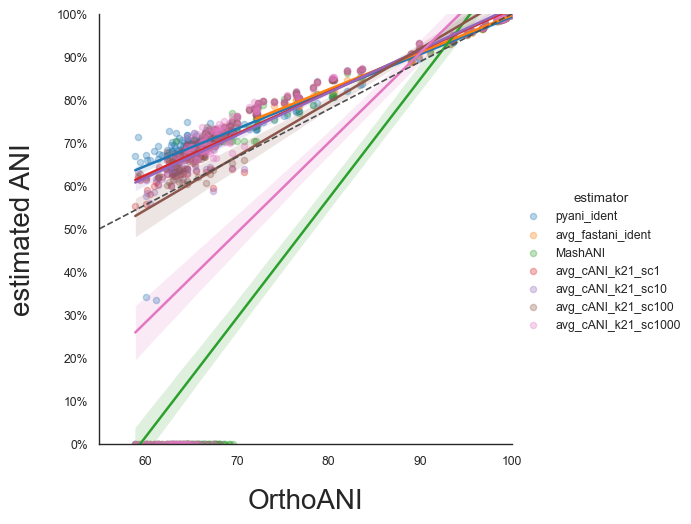

In [8]:
# lmplot, including the zeroes
sns.set_style("white")
#with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    
g=sns.lmplot(data=melted,x="orthoANI_value", y="ANI", hue="estimator", scatter_kws={"s": 20, "alpha":0.3})
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
xlim=(55, 100)#None
ylim= (0, 1)
for ax in g.fig.axes:
    ax.set(xlim=xlim, ylim=ylim)
    ax.plot(xlim, (0.5, 1), ls="--", c=".3")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    #ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
plt.xlabel("OrthoANI", size=20, labelpad=15)
plt.ylabel("estimated ANI", size=20, labelpad=15)
fig = g.fig
    #g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
      #plt.subplots_adjust(top=0.8) 
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.pdf",bbox_inches='tight')
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.png",bbox_inches='tight')

Text(46.888729166666664, 0.5, 'estimated ANI')

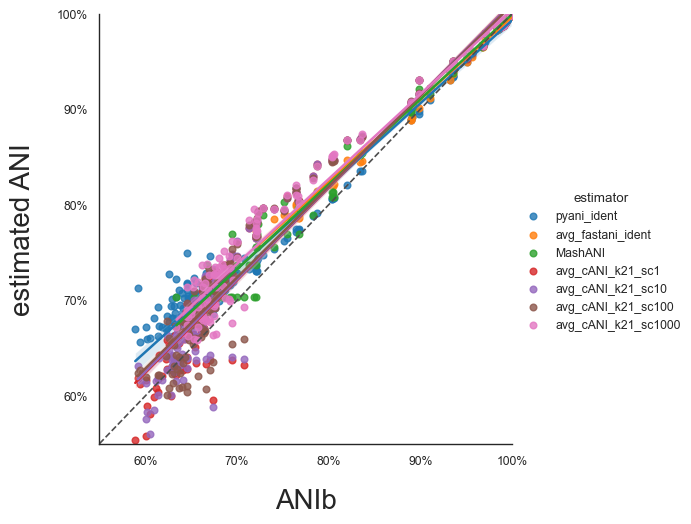

In [9]:
# plot just the non-zero values
g=sns.lmplot(data=melted,x="orthoANI_value", y="ANI_nz", hue="estimator")
xlim=(55, 100)
ylim= (.55, 1)
for ax in g.fig.axes:
    ax.set(xlim=xlim, ylim=ylim)
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=100,decimals=0))
plt.xlabel("ANIb", size=20, labelpad=15)
plt.ylabel("estimated ANI", size=20, labelpad=15)

In [10]:
labelD = {"pyani_ident": "pyANI", "avg_fastani_ident": "FastANI", "MashANI": "MASH", 
          "avg_cANI_k21_sc1": "sourmash sc1", "avg_cANI_k21_sc10": "sourmash sc10", 
          "avg_cANI_k21_sc100": "sourmash sc100", 'avg_cANI_k21_sc1000': "sourmash sc1000"}
labelD

{'pyani_ident': 'pyANI',
 'avg_fastani_ident': 'FastANI',
 'MashANI': 'MASH',
 'avg_cANI_k21_sc1': 'sourmash sc1',
 'avg_cANI_k21_sc10': 'sourmash sc10',
 'avg_cANI_k21_sc100': 'sourmash sc100',
 'avg_cANI_k21_sc1000': 'sourmash sc1000'}

Text(0.5, 1.0, 'Similarity of ANI approaches to ANIb')

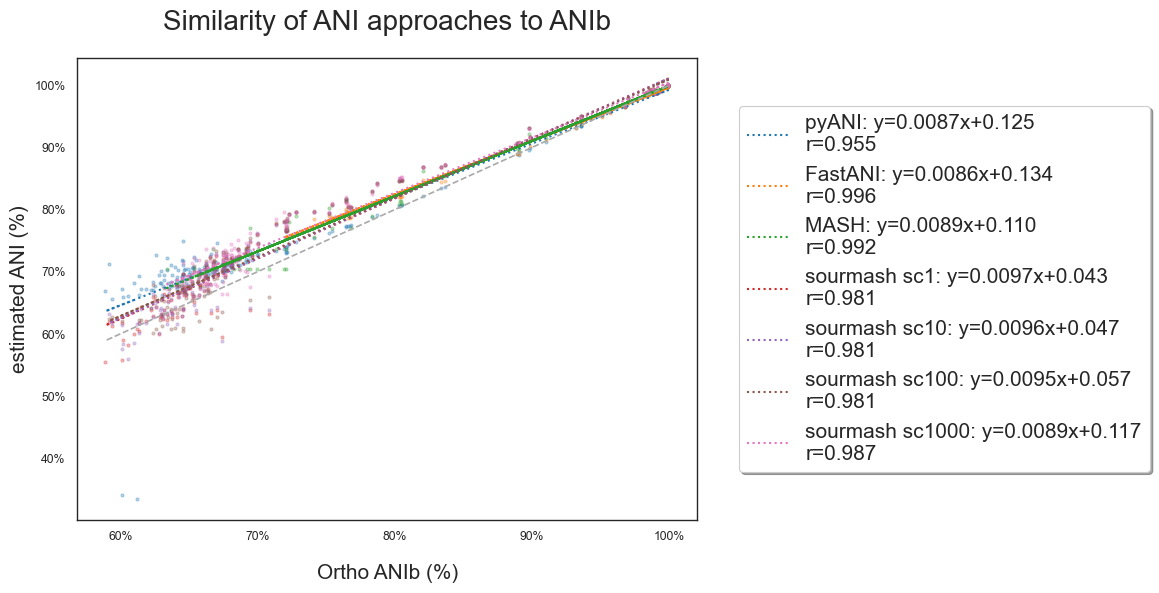

In [11]:

# do the linear regressions manually; plot all on same plot
#https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
vars_of_interest = labelD.keys()
sns.set_style("white")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
#above_75 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.75]

for var in vars_of_interest:
    x_col = "orthoANI_value"
    y_col = "ANI"
    #color = ani_colors[var]
    df = melted[melted['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5) #,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    #r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}: y={slope:.4f}x+{intercept:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y,  label = line_label, linewidth=1.5, linestyle=':') #color = color,
    #plt.plot(df[x_col], predict_y, color = color, label = r_label)

# plot 1:1 line
xlim=(59, 100)#None
ylim= (0.59, 1)
ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
# axis settings
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=100,decimals=0))
#ax.tick_params(axis='x', labelsize= 15)
#ax.tick_params(axis='y', labelsize= 15)
#plt.autoscale(True)
ax.set_ylabel("estimated ANI (%)", size=15)
ax.set_xlabel("Ortho ANIb (%)", size=15, labelpad=15)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of ANI approaches to ANIb", pad=20, size=20)

Text(0.5, 1.0, 'Similarity of ANI approaches to ANIb')

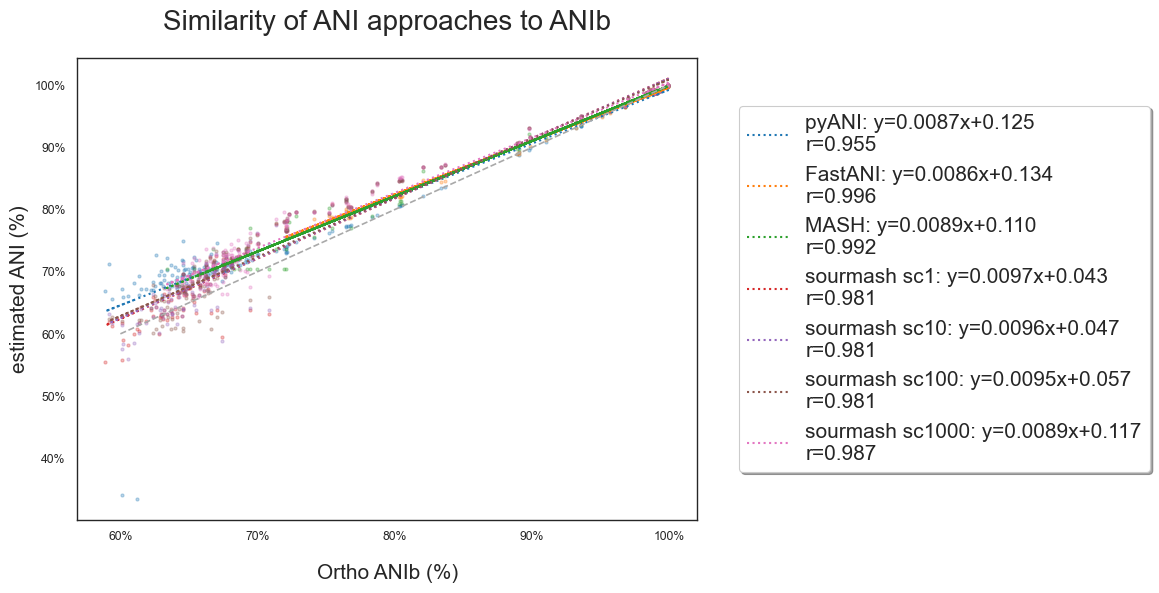

In [12]:

# do the linear regressions manually; plot all on same plot
#https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
vars_of_interest = labelD.keys()
sns.set_style("white")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
#above_75 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.75]

for var in vars_of_interest:
    x_col = "orthoANI_value"
    y_col = "ANI"
    #color = ani_colors[var]
    df = melted[melted['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5) #,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    #r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}: y={slope:.4f}x+{intercept:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y,  label = line_label, linewidth=1.5, linestyle=':') #color = color,


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(60, 100)#None
ylim= (0.75, 1)
ax.plot((60,100), (.6, 1), ls="--",color="darkgrey") #c=".3"
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=100,decimals=0))
#ax.tick_params(axis='x', labelsize= 15)
#ax.tick_params(axis='y', labelsize= 15)

#plt.autoscale(True)
ax.set_ylabel("estimated ANI (%)", size=15)
ax.set_xlabel("Ortho ANIb (%)", size=15, labelpad=15)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of ANI approaches to ANIb", pad=20, size=20)